# Exploratory Data Analysis
Analyzing the csv files

In [558]:
import pandas as pd

### Loading icebreakers_extract.csv as a pandas dataframe

In [559]:
df = pd.read_csv("./data/icebreakers_extract.csv")
df

,title,price,questions,advisor_id,deleted_at,user_skill_id,preview_media_url,icebreaker_type,allow_quantity,share_allowed_org,share_allowed_platform,description,locale,icebreaker_translations
0,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":92540555320,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
1,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":81797796808,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
2,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":38078152200,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
3,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":35844159078,""body"":{""body"":""What is you...",1,NaN,8,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
4,Financial Recovery Aid Applications,NaN,"[{""id"":10699678759,""body"":{""body"":""What is you...",1,NaN,39,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3


### Droping irrelevant columns

In [560]:
to_drop = ['advisor_id', 
           'deleted_at', 
           'user_skill_id', 
           'preview_media_url', 
           'icebreaker_type', 
           'allow_quantity', 
           'share_allowed_org', 
           'share_allowed_platform', 
           'locale', 
           'icebreaker_translations',
          'price']

df.drop(columns=to_drop, inplace=True)
df

,title,questions,description
0,Return Journey Planning - Eligibility & Legal ...,"[{""id"":92540555320,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
1,Return Journey Planning - Eligibility & Legal ...,"[{""id"":81797796808,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
2,Return Journey Planning - Eligibility & Legal ...,"[{""id"":38078152200,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
3,Return Journey Planning - Eligibility & Legal ...,"[{""id"":35844159078,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
4,Financial Recovery Aid Applications,"[{""id"":10699678759,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...


In [561]:
# df['title'][4]

# # 'Financial Recovery Aid Applications'
# #'Return Journey Planning - Eligibility & Legal Requirements'

### initial comparison of question dicts

In [562]:
for i in range(5):
    for j in range(5):
        # print(df['title'][i] == df['title'][j])
        # print(df['description'][i] == df['description'][j]) # !!!
        if i!=j:
            print(df['questions'][i] == df['questions'][j], "i,j:", i,',', j)


False i,j: 0 , 1
False i,j: 0 , 2
False i,j: 0 , 3
False i,j: 0 , 4
False i,j: 1 , 0
False i,j: 1 , 2
False i,j: 1 , 3
False i,j: 1 , 4
False i,j: 2 , 0
False i,j: 2 , 1
False i,j: 2 , 3
False i,j: 2 , 4
False i,j: 3 , 0
False i,j: 3 , 1
False i,j: 3 , 2
False i,j: 3 , 4
False i,j: 4 , 0
False i,j: 4 , 1
False i,j: 4 , 2
False i,j: 4 , 3


### Results:
From the above results it seems that all 5 question sets are d/f from each other.
Let's inspect the question sets more closely.

In [563]:
# printing and visually inspecting all questions in question-set 1
import json
for i in json.loads(df['questions'][0]):
    print(i['body']['body'], end='\n\n')


What is your current legal status in Germany: Temporary Protection under EU Directive | Asylum application pending | Asylum granted | German residence permit | Other status | Unsure

Do you intend to return to Ukraine: Permanently | Temporarily for a visit | Temporarily for family reasons | Temporarily for work or business | Not decided yet | Exploring options

When do you plan to travel: Within 1 month | 1-3 months | 3-6 months | 6-12 months | More than 1 year | Flexible depending on circumstances

Which Ukrainian passport or identification documents do you currently have: Valid Ukrainian passport | Expired Ukrainian passport | Ukrainian ID card | Ukrainian birth certificate | No Ukrainian documents | Emergency travel document needed

Are you currently employed or receiving social benefits in Germany: Employed full-time | Employed part-time | Unemployed receiving benefits | Student with support | Self-employed | Other income source

Will you need to complete Abmeldung before leaving G

### Results
First 4 question sets look exactly the same. Let's remove all spacing and compare them.

In [564]:
counter = 0

# iterate over firts 4 sets, we know for sure the 5th one is d/f from all others
for a in range(4):
    for b in range(4):
        # do not compare questions from the same set with each other
        if a==b:
            continue

        # iterate over all questions in the first question-set
        for i,k in enumerate(json.loads(df['questions'][a])):
            # print("".join(i['body']['body'].split()), end='\n\n')
            # iterate over all question in second question set
            for j,l in enumerate(json.loads(df['questions'][b])):
                # only compare questions from two d/f question sets, for which question numbers are exactly the same
                if i==j:
                    # comparison = "".join(k['body']['body'].split()) == "".join(l['body']['body'].split())
                    # comparing question-number-k from set-1, with question-number-l from set-2
                    comparison = k['body']['body'] == l['body']['body']
                    print('a,b,i,j:', a, b, i, ',', j, ' \n', comparison, sep='')
                    # if both questions are not same increment the counter by 1
                    if comparison == False:
                        counter+=1
        print('\n\n\n')

a,b,i,j:010,0 
True
a,b,i,j:011,1 
True
a,b,i,j:012,2 
True
a,b,i,j:013,3 
True
a,b,i,j:014,4 
True
a,b,i,j:015,5 
True
a,b,i,j:016,6 
True
a,b,i,j:017,7 
True
a,b,i,j:018,8 
True
a,b,i,j:019,9 
True
a,b,i,j:0110,10 
True
a,b,i,j:0111,11 
True
a,b,i,j:0112,12 
True
a,b,i,j:0113,13 
True
a,b,i,j:0114,14 
True
a,b,i,j:0115,15 
True
a,b,i,j:0116,16 
True
a,b,i,j:0117,17 
True
a,b,i,j:0118,18 
True
a,b,i,j:0119,19 
True
a,b,i,j:0120,20 
True
a,b,i,j:0121,21 
True




a,b,i,j:020,0 
True
a,b,i,j:021,1 
True
a,b,i,j:022,2 
True
a,b,i,j:023,3 
True
a,b,i,j:024,4 
True
a,b,i,j:025,5 
True
a,b,i,j:026,6 
True
a,b,i,j:027,7 
True
a,b,i,j:028,8 
True
a,b,i,j:029,9 
True
a,b,i,j:0210,10 
True
a,b,i,j:0211,11 
True
a,b,i,j:0212,12 
True
a,b,i,j:0213,13 
True
a,b,i,j:0214,14 
True
a,b,i,j:0215,15 
True
a,b,i,j:0216,16 
True
a,b,i,j:0217,17 
True
a,b,i,j:0218,18 
True
a,b,i,j:0219,19 
True
a,b,i,j:0220,20 
True
a,b,i,j:0221,21 
True




a,b,i,j:030,0 
True
a,b,i,j:031,1 
True
a,b,i,j:032,2 
True
a,b,

In [565]:
counter

0

### Results
The first 4 question sets contain exactly the same questions as well as options

In [566]:
# looking again the question sets we see only the ids are d/f
json.loads(df['questions'][4])

[{'id': 10699678759,
  'body': {'body': 'What is your current monthly income from all sources: Less than €500 | €500-€1,000 | €1,000-€1,500 | €1,500-€2,000 | More than €2,000 | Prefer not to say',
   'message_screenshots_attributes': [],
   'user_id': 1}},
 {'id': 15580129869,
  'body': {'body': 'How has your financial situation changed since arriving in Germany: Much worse than in Ukraine | Somewhat worse | About the same | Somewhat better | Much better',
   'message_screenshots_attributes': [],
   'user_id': 1}},
 {'id': 60010972635,
  'body': {'body': "Are you currently receiving German social benefits: Yes, Bürgergeld | Yes, other benefits | Applied but waiting | No, not eligible | No, haven't applied | Not sure",
   'message_screenshots_attributes': [],
   'user_id': 1}},
 {'id': 57622224382,
  'body': {'body': 'What are your biggest monthly expenses right now: Housing | Food | Healthcare | Childcare | Transportation | Debt payments | Remittances to family | Other',
   'message_sc

### Extracting question-options in useful format

In [567]:
import json
import re

for i in json.loads(df['questions'][4]):
    current_string  = i['body']['body']
    current_list    = re.split(r'[:|]', current_string)
    current_list[0] = current_list[0] + '?'
    for i,j in enumerate(current_list):
        if i!=0:
            # removing the first white space
            current_list[i] = current_list[i][1:]
            current_list[i] = str(i) + '. ' + current_list[i]
        
        print(current_list[i])
    print('\n')



What is your current monthly income from all sources?
1. Less than €500 
2. €500-€1,000 
3. €1,000-€1,500 
4. €1,500-€2,000 
5. More than €2,000 
6. Prefer not to say


How has your financial situation changed since arriving in Germany?
1. Much worse than in Ukraine 
2. Somewhat worse 
3. About the same 
4. Somewhat better 
5. Much better


Are you currently receiving German social benefits?
1. Yes, Bürgergeld 
2. Yes, other benefits 
3. Applied but waiting 
4. No, not eligible 
5. No, haven't applied 
6. Not sure


What are your biggest monthly expenses right now?
1. Housing 
2. Food 
3. Healthcare 
4. Childcare 
5. Transportation 
6. Debt payments 
7. Remittances to family 
8. Other


Do you currently have access to banking services in Germany?
1. Yes, full banking account 
2. Yes, basic account 
3. Limited access 
4. No, but trying to get access 
5. No, prefer not to use banks


Did you own property or a business in Ukraine?
1. Yes, residential property 
2. Yes, commercial property 

# Defining Pydantic models for the Questions, Options and Topics etc...


In [411]:
from __future__ import annotations

from typing import List, Union, Annotated, Literal, Optional
from uuid import uuid4
from pydantic import BaseModel, Field, model_validator


# ---- Option variants ----
class Predefined_Option(BaseModel):
    option_kind:   Literal["predefined"] = "predefined"  # discriminator
    option_number: int  = Field(ge=1, description="Option number, 1, 2, 3 and so on ...")
    option_str:    str
    value:         bool = Field(default=False, description="Binary flag (True/False).")



class UserDefined_Option(BaseModel):
    option_kind:   Literal["user_defined"] = "user_defined"  # discriminator
    option_number: int  = 1 #In this case it is always 1
    option_str:    str  = Field(default="empty str", description="The user writes whatever they want as an answer")
    value:         bool = Field(default=False, description="Binary flag (True/False).")



# Discriminated union of option variants
Option = Annotated[
    Union[Predefined_Option, UserDefined_Option],
    Field(discriminator="option_kind"),
]


# ---- Higher-level models ----
class Question(BaseModel):
    question_topic: str  # main topic this question belongs to
    question_id:    str = Field(default_factory=lambda: str(uuid4()))
    question_str:   str
    options:        List[Option] = Field(default_factory=list)




class Topic(BaseModel):
    topic_name: str
    topic_id:   str = Field(default_factory=lambda: str(uuid4()))
    questions:  List[Question] = Field(default_factory=list)

    def question_count(self) -> int:
        """Return the number of questions in this topic."""
        return len(self.questions)



class All_Topics(BaseModel):
    all_topics: List[Topic] = Field(default_factory=list)


In [412]:
# #Topic: 'Return Journey Planning - Eligibility & Legal Requirements'

# Return_Journey_Planning = Topic(topic_name    ='Return Journey Planning',
#                                 details ='We assess your eligibility and legal requirements to support your return journey planning.')

# Return_Journey_Planning

# c_q = Question(question_topic= Return_Journey_Planning.name, question_str = 'bla bla bla')

# c_o_1 = Predefined_Option(
#     option_str='water',
#     option_number=1
# )
# c_o_2 = Predefined_Option(
#     option_str='milk',
#     option_number=2
# )
# c_o_3 = Predefined_Option(
#     option_str='meat',
#     option_number=3
# )

# c_q.options.append(c_o_1)

# c_q

# c_q.options.append(c_o_2)

# c_q.options.append(c_o_3)

# Return_Journey_Planning.questions.append(c_q)

# Return_Journey_Planning.model_dump()

In [413]:
import json
import re


Return_Journey_Planning = Topic(topic_name    ='Return Journey Planning',
                                details ='We assess your eligibility and legal requirements to support your return journey planning.')

for i in json.loads(df['questions'][4]):
    
    # current question + options string
    question_and_answers_string  = i['body']['body']

    # splitting the str wherever we encounter `:` and `|` i.e. separating question and answers
    question_and_answers_list    = re.split(r'[:|]', question_and_answers_string)

    # adding `?` at the end of question
    question_and_answers_list[0] = question_and_answers_list[0] + '?'

    # iterating over question and answerS
    for i,j in enumerate(question_and_answers_list):
        
        # putting curent question in the list of questions of the current topic
        if i==0:
            Return_Journey_Planning.questions.append(
                Question(
                    question_topic    = Return_Journey_Planning.topic_name,
                    question_str = question_and_answers_list[0]
                )
            )
            if len(question_and_answers_list) < 2:
                Return_Journey_Planning.questions[-1].options.append(UserDefined_Option(
                    option_str = 'The user will type his/her own answer',
                    option_number     = 1
                    )
                )
            # print(question_and_answers_list[i])

        elif i>0:
            # removing the first white space
            question_and_answers_list[i] = question_and_answers_list[i][1:]
            #question_and_answers_list[i] = str(i) + '. ' + question_and_answers_list[i]
            
            Return_Journey_Planning.questions[-1].options.append(Predefined_Option(
                option_str = question_and_answers_list[i],
                option_number     = i)
            )
            # print(question_and_answers_list[i])
            
        
#        print(current_list[i])
    # print('\n')



In [414]:
Return_Journey_Planning.question_count()

27

In [415]:
Return_Journey_Planning.model_dump()

{'topic_name': 'Return Journey Planning',
 'topic_id': '201ae5d8-eb0f-4074-8f3b-6b15c2875e2b',
 'questions': [{'question_topic': 'Return Journey Planning',
   'question_id': '36043ab2-dc1f-4405-80c0-f8ee423fa20e',
   'question_str': 'What is your current monthly income from all sources?',
   'options': [{'option_kind': 'predefined',
     'option_number': 1,
     'option_str': 'Less than €500 ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 2,
     'option_str': '€500-€1,000 ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 3,
     'option_str': '€1,000-€1,500 ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 4,
     'option_str': '€1,500-€2,000 ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 5,
     'option_str': 'More than €2,000 ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 6,
     'option_str': 'Prefer not to say',
     'va

In [416]:
import json
import re


Financial_Recovery_Aid_Applications = Topic(
    topic_name ='Financial Recovery Aid Applications',
    details    ='We assess your eligibility and legal requirements to support your `Financial Recovery Aid Applications`.'
)

for i in json.loads(df['questions'][0]):
    
    # current question + options string
    question_and_answers_string  = i['body']['body']

    # splitting the str wherever we encounter `:` and `|` i.e. separating question and answers
    question_and_answers_list    = re.split(r'[:|]', question_and_answers_string)

    # adding `?` at the end of question
    question_and_answers_list[0] = question_and_answers_list[0] + '?'

    # iterating over question and answerS
    for i,j in enumerate(question_and_answers_list):
        
        # putting curent question in the list of questions of the current topic
        if i==0:
            Financial_Recovery_Aid_Applications.questions.append(
                Question(
                    question_topic    = Financial_Recovery_Aid_Applications.topic_name,
                    question_str = question_and_answers_list[0]
                )
            )
            if len(question_and_answers_list) < 2:
                Financial_Recovery_Aid_Applications.questions[-1].options.append(UserDefined_Option(
                    option_str = 'The user will type his/her own answer',
                    option_number     = 1
                    )
                )
            # print(question_and_answers_list[i])

        elif i>0:
            # removing the first white space
            question_and_answers_list[i] = question_and_answers_list[i][1:]
            #question_and_answers_list[i] = str(i) + '. ' + question_and_answers_list[i]
            
            Financial_Recovery_Aid_Applications.questions[-1].options.append(Predefined_Option(
                option_str = question_and_answers_list[i],
                option_number     = i)
            )
            # print(question_and_answers_list[i])
            
        
#        print(current_list[i])
    # print('\n')



In [417]:
Financial_Recovery_Aid_Applications.model_dump()

{'topic_name': 'Financial Recovery Aid Applications',
 'topic_id': 'ec597340-158e-4856-9aae-7b8e69914d83',
 'questions': [{'question_topic': 'Financial Recovery Aid Applications',
   'question_id': '068bf54e-3a98-4ca3-bb59-e001f9a78479',
   'question_str': 'What is your current legal status in Germany?',
   'options': [{'option_kind': 'predefined',
     'option_number': 1,
     'option_str': 'Temporary Protection under EU Directive ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 2,
     'option_str': 'Asylum application pending ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 3,
     'option_str': 'Asylum granted ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 4,
     'option_str': 'German residence permit ',
     'value': False},
    {'option_kind': 'predefined',
     'option_number': 5,
     'option_str': 'Other status ',
     'value': False},
    {'option_kind': 'predefined',
     'opti

In [418]:
all_topics = All_Topics(
    all_topics = [
        Return_Journey_Planning,
        Financial_Recovery_Aid_Applications,
    ]
)

In [419]:
all_topics

All_Topics(all_topics=[Topic(topic_name='Return Journey Planning', topic_id='201ae5d8-eb0f-4074-8f3b-6b15c2875e2b', questions=[Question(question_topic='Return Journey Planning', question_id='36043ab2-dc1f-4405-80c0-f8ee423fa20e', question_str='What is your current monthly income from all sources?', options=[Predefined_Option(option_kind='predefined', option_number=1, option_str='Less than €500 ', value=False), Predefined_Option(option_kind='predefined', option_number=2, option_str='€500-€1,000 ', value=False), Predefined_Option(option_kind='predefined', option_number=3, option_str='€1,000-€1,500 ', value=False), Predefined_Option(option_kind='predefined', option_number=4, option_str='€1,500-€2,000 ', value=False), Predefined_Option(option_kind='predefined', option_number=5, option_str='More than €2,000 ', value=False), Predefined_Option(option_kind='predefined', option_number=6, option_str='Prefer not to say', value=False)]), Question(question_topic='Return Journey Planning', question_

## Filling in the Form

In [420]:
rjp_form = Return_Journey_Planning.model_copy()
# rjp_form

In [421]:
rjp_form.questions[0].options

[Predefined_Option(option_kind='predefined', option_number=1, option_str='Less than €500 ', value=False),
 Predefined_Option(option_kind='predefined', option_number=2, option_str='€500-€1,000 ', value=False),
 Predefined_Option(option_kind='predefined', option_number=3, option_str='€1,000-€1,500 ', value=False),
 Predefined_Option(option_kind='predefined', option_number=4, option_str='€1,500-€2,000 ', value=False),
 Predefined_Option(option_kind='predefined', option_number=5, option_str='More than €2,000 ', value=False),
 Predefined_Option(option_kind='predefined', option_number=6, option_str='Prefer not to say', value=False)]

In [422]:
rjp_form.questions[0].options[5].value

False

In [423]:
rjp_form.questions[0].options[5].value = True

In [424]:
rjp_form.questions[0].options[5].value

True

In [428]:
rjp_form.questions[-1].options[0]

UserDefined_Option(option_kind='user_defined', option_number=1, option_str='The user will type his/her own answer', value=False)

In [430]:
rjp_form.questions[-1].options[0].option_str

'The user will type his/her own answer'

In [431]:
rjp_form.questions[-1].options[0].option_str = 'blablabla@gmail.com'

In [432]:
rjp_form.questions[-1].options[0].option_str

'blablabla@gmail.com'

In [433]:
rjp_form.questions[-1].options[0].value = True

In [434]:
rjp_form.questions[-1].options[0]

UserDefined_Option(option_kind='user_defined', option_number=1, option_str='blablabla@gmail.com', value=True)

# Developing the Agent

In [241]:
from langgraph.graph import StateGraph, START
from langgraph.graph import END, MessagesState, StateGraph
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

from langchain_openai import ChatOpenAI


import os
from dotenv import load_dotenv

from langgraph.checkpoint.memory import MemorySaver

load_dotenv()  # Load environment variables from a .env file

# Access API keys and credentials
OPENAI_API_KEY    = os.environ["OPENAI_API_KEY"]
# TIMESCALE_DB_URI  = os.environ["TIMESCALE_DB_URI"]
# TAVILY_API_KEY    = os.environ["TAVILY_API_KEY"]
# LANGCHAIN_API_KEY = os.environ["LANGCHAIN_API_KEY"] 
# MAIN_AGENT_DB_URI = os.environ["MAIN_AGENT_DB_URI"]

# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"]    = "langchain-academy"




class AgentState(MessagesState, total=False):
    """`total=False` marks fields added here as optional (PEP 589),
    while inherited fields (like `messages` from MessagesState) keep their original requirements.

    documentation: https://typing.readthedocs.io/en/latest/spec/typeddict.html#totality
    """
    # # Safety metadata from LlamaGuard (populated by guard nodes)
    # safety: LlamaGuardOutput

    # # LangGraph-managed remaining step budget for the current run
    # remaining_steps: RemainingSteps


MODEL_SYSTEM_MESSAGE = """ You are a helpful chatbot on the website of an accounting firm.
Your role is to provide users with accurate information about the firm’s services.
The details of services provided by the accounting firm are as follows:

<accounting_services>
{accounting_services}
</accounting_services>
"""


accounting_services = 'null'


async def acall_model(state: AgentState, config: RunnableConfig) -> AgentState:
    """Main model node:
       - Selects the concrete model (from config or default),
       - Runs the tool-enabled chat model,
       - Post-checks the output with LlamaGuard,
       - Enforces step budget if tool calls remain."""
    
    # can later decide to place it outside the fn, if observed high latency in traces
    # Initialize OpenAI's GPT model
    model      = ChatOpenAI(model="gpt-4.1-nano-2025-04-14", temperature=0)
    
    system_msg = MODEL_SYSTEM_MESSAGE.format(accounting_services=accounting_services)
    response   = await model.ainvoke(
                                        [SystemMessage(content=system_msg)] + state["messages"],
                                        config=config
                                    )
    
    return {"messages": [response]}



# -------------------------
# BUILD THE GRAPH
# -------------------------


# from IPython.display import Image, display




builder = StateGraph(AgentState)

builder.add_node("acall_model", acall_model)

builder.set_entry_point("acall_model")
builder.add_edge('acall_model', END)


memory = MemorySaver()

# Compile the graph with persistent checkpointer and in-memory store
basic_langgraph_agent = builder.compile(checkpointer=memory)#, store=across_thread_memory) #checkpointer


In [245]:
config = RunnableConfig(user_id='1', thread_id='1')
output = await basic_langgraph_agent.ainvoke({'messages': 'hi'}, config=config)
for message in output['messages']:
    message.pretty_print()

================================ Human Message =================================

hi
================================== Ai Message ==================================

Hello! Welcome to our accounting firm. How can I assist you today?


In [246]:
config = RunnableConfig(user_id='1', thread_id='1')
output = await basic_langgraph_agent.ainvoke({'messages': 'my anme is Ans'}, config=config)
for message in output['messages']:
    message.pretty_print()

================================ Human Message =================================

hi
================================== Ai Message ==================================

Hello! Welcome to our accounting firm. How can I assist you today?
================================ Human Message =================================

my anme is Ans
================================== Ai Message ==================================

Hello, Ans! Nice to meet you. How can I help you with our accounting services today?


# Exploring Architecture Choices

### Interrupt agent

In [435]:
"""
A minimal LangGraph agent that:
- Asks a fixed list of questions as **AI messages** (no LLMs involved)
- Waits for the user's **human** reply at each step using `interrupt`
- Fills a form on the fly
- When all questions are answered, returns the filled form as a final **AI** message in Markdown

Graph topology (no external loop):
START -> ask_question -> (loops back to ask_question until done) -> finalize -> END

To use at runtime, compile with a MemorySaver checkpointer and a thread_id. Each time the graph
interrupts, resume it by providing the user's answer for that thread. See the notes at the bottom.
"""
from __future__ import annotations
from typing import TypedDict, Annotated, Dict, List

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.types import interrupt
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage

# --- Static configuration (no LLMs involved) ---------------------------------
list_of_questions: List[str] = [
    "what is your name?",
    "what is your age?",
    "what is your hair color?",
]
# Keys for the form (aligned by index to the questions above)
form_fields: List[str] = ["name", "age", "hair_color"]


# --- State -------------------------------------------------------------------
class SurveyState(TypedDict):
    """Graph state.

    - messages accumulates chat history (AI + Human)
    - idx is the index of the next question to ask
    - answers is the partially filled form
    """

    messages: Annotated[List[BaseMessage], add_messages]
    idx: int
    answers: Dict[str, str]


# --- Nodes -------------------------------------------------------------------

def ask_question(state: SurveyState) -> SurveyState:
    """Ask the current question as an AI message, pause for a human reply, then
    record the answer and advance `idx`.

    This node loops on itself via conditional routing until all questions are answered.
    """
    i = state.get("idx", 0)

    # If we've exhausted the questions, do nothing here; routing will send us to finalize
    if i >= len(list_of_questions):
        return {}

    question = list_of_questions[i]

    # 1) Interrupt to yield control and **ask** the question. The value we pass to
    #    `interrupt(...)` is what the caller will see and should respond to.
    #    When the graph is resumed with the user's reply, `answer` will contain that value.
    answer: str = interrupt(question)

    # 2) After resume, we append both the AI question and the Human answer to history
    #    and update the form in state.
    new_answers = dict(state.get("answers", {}))
    new_answers[form_fields[i]] = answer

    return {
        "messages": [
            AIMessage(content=question),
            HumanMessage(content=answer),
        ],
        "answers": new_answers,
        "idx": i + 1,
    }


def finalize(state: SurveyState) -> SurveyState:
    """Emit a final AI message with the filled form in Markdown."""
    # Build Markdown summary deterministically in question order
    lines = ["# Filled Form", ""]
    for key in form_fields:
        val = state.get("answers", {}).get(key, "")
        # Pretty label
        label = key.replace("_", " ").title()
        lines.append(f"- **{label}:** {val}")
    md = "\n".join(lines)

    return {"messages": [AIMessage(content=md)]}


# --- Graph -------------------------------------------------------------------
workflow = StateGraph(SurveyState)
workflow.add_node("ask_question", ask_question)
workflow.add_node("finalize", finalize)

# Entry
workflow.add_edge(START, "ask_question")

# Conditional routing: keep asking until all questions are answered

def route_after_ask(state: SurveyState) -> str:
    return "finalize" if state.get("idx", 0) >= len(list_of_questions) else "ask_question"

workflow.add_conditional_edges(
    "ask_question",
    route_after_ask,
    {
        "ask_question": "ask_question",
        "finalize": "finalize",
    },
)

# Exit
workflow.add_edge("finalize", END)

# Compile with an in-memory checkpointer so we can resume after each interrupt
checkpointer = MemorySaver()
app = workflow.compile(checkpointer=checkpointer)


# --- Usage notes (pseudo)
#
# from uuid import uuid4
# thread_id = f"survey-{uuid4()}"
# cfg = {"configurable": {"thread_id": thread_id}}
#
# # Kick off (provide initial state once)
# _ = app.invoke({"messages": [], "idx": 0, "answers": {}}, cfg)
#
# # Each time the graph interrupts, it returns control to you with the question value.
# # You then resume the SAME thread by providing the user's reply to the interrupt.
# # The exact resume API depends on your runner. With LangGraph's assistants-style runner
# # you typically provide the answer as the resume input for that thread and call invoke again.
# #
# # Example (conceptual):
# #   q1 = app.get_state(cfg).next  # or capture from your runtime's interrupt hook
# #   app.invoke("Alice", cfg)      # resume with the human's reply
# #   q2 = app.get_state(cfg).next
# #   app.invoke("30", cfg)
# #   q3 = app.get_state(cfg).next
# #   result = app.invoke("Brown", cfg)
# #
# # The final invocation will route to `finalize` and append a Markdown AI message like:
# #
# #   # Filled Form
# #   - **Name:** Alice
# #   - **Age:** 30
# #   - **Hair Color:** Brown
# #
# # No external loop is necessary for the agent logic; the loop is encoded in the graph via
# # the conditional self-edge on `ask_question`.


In [437]:
cfg = {"configurable": {"thread_id": '1'}}

# Kick off (provide initial state once)
output = app.invoke({"messages": [], "idx": 0, "answers": {}}, cfg)
output

{'messages': [],
 'idx': 0,
 'answers': {},
 '__interrupt__': [Interrupt(value='what is your name?', id='4cb34d5415a41db56fe8f0e6b5fffeab')]}

## Without Interrupt- Purely Routing based

In [ ]:
"""
A minimal LangGraph survey agent WITHOUT `interrupt`.

Flow (no external loop inside graph logic):
START -> ask_question (asks or records) -> [END to wait for user OR ask again] -> ... -> finalize -> END

Behavior:
- Sends each question as an AI message.
- On the next invocation (after the user replies), it records the latest human message
  as the answer for the pending question, advances, and immediately asks the next one.
- After the last answer, it emits a final AI message containing the filled Markdown form.

You still resume the SAME thread per user turn (no busy loop). The pause is achieved by
conditionally routing to END when awaiting a human reply.
"""
from __future__ import annotations
from typing import TypedDict, Annotated, Dict, List

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage

# --- Static configuration (no LLMs involved) ---------------------------------
list_of_questions: List[str] = [
    "what is your name?",
    "what is your age?",
    "what is your hair color?",
]
form_fields: List[str] = ["name", "age", "hair_color"]


# --- State -------------------------------------------------------------------
class SurveyState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]
    idx: int                    # index of the current/question-to-ask-or-record
    awaiting_answer: bool       # True if we've asked and are waiting for a human reply
    answers: Dict[str, str]     # the growing form


# --- Nodes -------------------------------------------------------------------

def ask_question(state: SurveyState) -> SurveyState:
    """One node handles BOTH asking and recording depending on state.

    - If awaiting_answer and the latest message is Human -> record answer, advance idx.
    - Else if not awaiting_answer and there are questions left -> ask next question (AI message) and set awaiting.
    - Else do nothing (routing will handle finalize / wait).
    """
    idx = state.get("idx", 0)
    awaiting = state.get("awaiting_answer", False)
    msgs = state.get("messages", [])

    # If done, nothing to do here; routing will send to finalize
    if idx >= len(list_of_questions):
        return {}

    # Case 1: We previously asked; now record the user's reply (latest message)
    if awaiting and msgs and isinstance(msgs[-1], HumanMessage):
        answer_text = str(msgs[-1].content[0]['text'])
        new_answers = dict(state.get("answers", {}))
        new_answers[form_fields[idx]] = answer_text
        return {
            "answers": new_answers,
            "idx": idx + 1,           # move to the next question index
            "awaiting_answer": False, # we just consumed the answer
        }

    # Case 2: Not awaiting and there are questions left -> ask the next question
    if not awaiting:
        question = list_of_questions[idx]
        return {
            "messages": [AIMessage(content=question)],
            "awaiting_answer": True,
        }

    # Case 3: Awaiting but no human yet -> nothing to update (we'll route to END)
    return {}


def finalize(state: SurveyState) -> SurveyState:
    lines = ["# Filled Form", ""]
    for key in form_fields:
        val = state.get("answers", {}).get(key, "")
        label = key.replace("_", " ").title()
        lines.append(f"- **{label}:** {val}")
    md = "\n".join(lines)
    return {"messages": [AIMessage(content=md)]}


# --- Graph -------------------------------------------------------------------
workflow = StateGraph(SurveyState)
workflow.add_node("ask_question", ask_question)
workflow.add_node("finalize", finalize)

# Entry
workflow.add_edge(START, "ask_question")

# Conditional routing to either continue asking, wait for user (END), or finalize

def route(state: SurveyState) -> str:
    idx = state.get("idx", 0)
    if idx >= len(list_of_questions):
        return "finalize"
    if state.get("awaiting_answer", False):
        # Pause run; wait for a HumanMessage in the next invocation
        return "END"
    return "ask_question"

workflow.add_conditional_edges(
    "ask_question",
    route,
    {
        "ask_question": "ask_question",
        "finalize": "finalize",
        "END": END,
    },
)

# Exit
workflow.add_edge("finalize", END)

# Compile with an in-memory checkpointer; resume by calling invoke() on the same thread_id
checkpointer = MemorySaver()
app = workflow.compile(checkpointer=checkpointer)


# --- Usage (conceptual) ------------------------------------------------------
# from uuid import uuid4
# thread_id = f"survey-no-interrupt-{uuid4()}"
# cfg = {"configurable": {"thread_id": thread_id}}
#
# # Kick off the flow
# app.invoke({"messages": [], "idx": 0, "awaiting_answer": False, "answers": {}}, cfg)
#   -> emits AI: "what is your name?" and then stops (awaiting_answer=True)
#
# # When the user replies, resume the SAME thread with their HumanMessage
# app.invoke({"messages": [HumanMessage("Alice")]}, cfg)
#   -> records name, immediately asks next AI question, pauses
# app.invoke({"messages": [HumanMessage("30")]}, cfg)
#   -> records age, asks hair color, pauses
# result = app.invoke({"messages": [HumanMessage("Brown")]}, cfg)
#   -> records hair color, emits final Markdown summary as AI, ends


In [443]:
cfg = {"configurable": {"thread_id": '1'}}

# Kick off the flow
out = app.invoke({"messages": [], "idx": 0, "awaiting_answer": True, "answers": {}}, cfg)
for msg in out['messages']:
    msg.pretty_print()


================================== Ai Message ==================================

what is your name?


In [444]:
cfg = {"configurable": {"thread_id": '1'}}

# Kick off the flow
out = app.invoke({"messages": ['my anme is Ans'], "idx": 0, "awaiting_answer": True, "answers": {}}, cfg)
for msg in out['messages']:
    msg.pretty_print()


================================== Ai Message ==================================

what is your name?
================================ Human Message =================================

my anme is Ans
================================== Ai Message ==================================

what is your age?


### Decision:
Purely routing based architecture is better

# Main Prototype Agent

### Defining and partially populating forms

In [6]:
from __future__ import annotations

from typing import List, Union, Annotated, Literal, Optional
from uuid import uuid4
from pydantic import BaseModel, Field, model_validator


# ---- Option variants ----
class Predefined_Option(BaseModel):
    option_kind:   Literal["predefined"] = "predefined"  # discriminator
    option_number: int  = Field(ge=1, description="Option number, 1, 2, 3 and so on ...")
    option_str:    str
    value:         bool = Field(default=False, description="Binary flag (True/False).")



class UserDefined_Option(BaseModel):
    option_kind:   Literal["user_defined"] = "user_defined"  # discriminator
    option_number: int  = 1 #In this case it is always 1
    option_str:    str  = Field(default="empty str", description="The user writes whatever they want as an answer")
    value:         bool = Field(default=False, description="Binary flag (True/False).")



# Discriminated union of option variants
Option = Annotated[
    Union[Predefined_Option, UserDefined_Option],
    Field(discriminator="option_kind"),
]


# ---- Higher-level models ----
class Question(BaseModel):
    question_topic: str  # main topic this question belongs to
    question_id:    str = Field(default_factory=lambda: str(uuid4()))
    question_str:   str
    options:        List[Option] = Field(default_factory=list)




class Topic(BaseModel):
    topic_name: str
    topic_id:   str = Field(default_factory=lambda: str(uuid4()))
    questions:  List[Question] = Field(default_factory=list)

    def question_count(self) -> int:
        """Return the number of questions in this topic."""
        return len(self.questions)



class All_Topics(BaseModel):
    all_topics: List[Topic] = Field(default_factory=list)


#### Partially populating `Return Journey Planning` form

In [569]:
import json
import re


Return_Journey_Planning = Topic(
    topic_name = 'Return Journey Planning',
    details    = 'We assess your eligibility and legal requirements to support your return journey planning.'
)

for i in json.loads(df['questions'][4]):
    
    # current question + options string
    question_and_answers_string  = i['body']['body']

    # splitting the str wherever we encounter `:` and `|` i.e. separating question and answers
    question_and_answers_list    = re.split(r'[:|]', question_and_answers_string)

    # adding `?` at the end of question
    question_and_answers_list[0] = question_and_answers_list[0] + '?'

    # iterating over question and answerS
    for i,j in enumerate(question_and_answers_list):
        
        # putting curent question in the list of questions of the current topic
        if i==0:
            Return_Journey_Planning.questions.append(
                Question(
                    question_topic = Return_Journey_Planning.topic_name,
                    question_str   = question_and_answers_list[0]
                )
            )
            if len(question_and_answers_list) < 2:
                Return_Journey_Planning.questions[-1].options.append(UserDefined_Option(
                    option_str    = 'The user will type his/her own answer',
                    option_number = 1
                    )
                )
            # print(question_and_answers_list[i])

        elif i>0:
            # removing the first white space
            question_and_answers_list[i] = question_and_answers_list[i][1:]
            #question_and_answers_list[i] = str(i) + '. ' + question_and_answers_list[i]
            
            Return_Journey_Planning.questions[-1].options.append(Predefined_Option(
                option_str = question_and_answers_list[i],
                option_number     = i)
            )
            # print(question_and_answers_list[i])
            
        
#        print(current_list[i])
    # print('\n')



In [570]:
return_journey_planning_form = Return_Journey_Planning.model_copy()
# return_journey_planning_form

In [3]:
# import json
# with open("return_journey_planning_form.json", "w") as f:
#     f.write(return_journey_planning_form.model_dump_json())


In [8]:
# loading partially filled forms
with open("return_journey_planning_form.json", "r") as f:
    data   = json.load(f)
return_journey_planning_form = Topic(**data)
#return_journey_planning_form


### Partially populating `Financial Recovery Aid` form

In [571]:
import json
import re


Financial_Recovery_Aid_Applications = Topic(
    topic_name = 'Financial Recovery Aid Application',
    details    = 'We assess your eligibility and legal requirements to support your `Financial Recovery Aid Applications`.'
)

for i in json.loads(df['questions'][0]):
    
    # current question + options string
    question_and_answers_string  = i['body']['body']

    # splitting the str wherever we encounter `:` and `|` i.e. separating question and answers
    question_and_answers_list    = re.split(r'[:|]', question_and_answers_string)

    # adding `?` at the end of question
    question_and_answers_list[0] = question_and_answers_list[0] + '?'

    # iterating over question and answerS
    for i,j in enumerate(question_and_answers_list):
        
        # putting curent question in the list of questions of the current topic
        if i==0:
            Financial_Recovery_Aid_Applications.questions.append(
                Question(
                    question_topic    = Financial_Recovery_Aid_Applications.topic_name,
                    question_str = question_and_answers_list[0]
                )
            )
            if len(question_and_answers_list) < 2:
                Financial_Recovery_Aid_Applications.questions[-1].options.append(UserDefined_Option(
                    option_str = 'The user will type his/her own answer',
                    option_number     = 1
                    )
                )
            # print(question_and_answers_list[i])

        elif i>0:
            # removing the first white space
            question_and_answers_list[i] = question_and_answers_list[i][1:]
            #question_and_answers_list[i] = str(i) + '. ' + question_and_answers_list[i]
            
            Financial_Recovery_Aid_Applications.questions[-1].options.append(Predefined_Option(
                option_str = question_and_answers_list[i],
                option_number     = i)
            )
            # print(question_and_answers_list[i])
            
        
#        print(current_list[i])
    # print('\n')



In [572]:
financial_recovery_aid_form = Financial_Recovery_Aid_Applications.model_copy()

In [574]:
# financial_recovery_aid_form

In [576]:
# with open("financial_recovery_aid_form.json", "w") as f:
#     f.write(financial_recovery_aid_form.model_dump_json())


In [10]:
with open("financial_recovery_aid_form.json", "r") as f:
    data = json.load(f)
financial_recovery_aid_form = Topic(**data)
# financial_recovery_aid_form

## Developing Main Prototype Agent

In [31]:
from __future__ import annotations

from typing import List, Union, Annotated, Literal, Optional
from uuid import uuid4
from pydantic import BaseModel, Field
import json

# ---- Option variants ----
class Predefined_Option(BaseModel):
    option_kind:   Literal["predefined"] = "predefined"  # discriminator
    option_number: int  = Field(ge=1, description="Option number, 1, 2, 3 and so on ...")
    option_str:    str
    value:         bool = Field(default=False, description="Binary flag (True/False).")

class UserDefined_Option(BaseModel):
    option_kind:   Literal["user_defined"] = "user_defined"  # discriminator
    option_number: int  = 1  # In this case it is always 1
    option_str:    str  = Field(default="empty str", description="The user writes whatever they want as an answer")
    value:         bool = Field(default=False, description="Binary flag (True/False).")

# Discriminated union of option variants
Option = Annotated[
    Union[Predefined_Option, UserDefined_Option],
    Field(discriminator="option_kind"),
]

# ---- Higher-level models ----
class Question(BaseModel):
    question_topic: str  # main topic this question belongs to
    question_id:    str = Field(default_factory=lambda: str(uuid4()))
    question_str:   str
    options:        List[Option] = Field(default_factory=list)

class Topic(BaseModel):
    topic_name: str
    topic_id:   str = Field(default_factory=lambda: str(uuid4()))
    questions:  List[Question] = Field(default_factory=list)

    def question_count(self) -> int:
        """Return the number of questions in this topic."""
        return len(self.questions)

class All_Topics(BaseModel):
    all_topics: List[Topic] = Field(default_factory=list)

# ---- Load forms ----
with open("return_journey_planning_form.json", "r") as f:
    data = json.load(f)
return_journey_planning_form = Topic(**data)

with open("financial_recovery_aid_form.json", "r") as f:
    data = json.load(f)
financial_recovery_aid_form = Topic(**data)

# ---- LangGraph / LangChain imports ----
from typing import Annotated, List, Literal, Optional
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage

FormName = Literal[return_journey_planning_form.topic_name, financial_recovery_aid_form.topic_name]

class AgentState(BaseModel):
    """
    messages:            conversation buffer handled by LangGraph (add_messages aggregator)
    form_filling_initiated: once a form has been chosen
    form_being_filled:   the name of the form currently in progress
    already_filled_forms: record of forms that were completed in this thread
    awaiting_initial:    waiting for the user to choose form 1 or 2
    awaiting_answer:     waiting for a numeric answer to the current question
    idx:                 question index within the current form
    form:                a working copy of the selected Topic
    question_limit:      OPTIONAL cap on how many questions to ask (e.g., 3 or 4). If None -> ask all.
    """
    messages:               Annotated[List[BaseMessage], add_messages]
    form_filling_initiated: bool = False
    form_being_filled:      Optional[FormName] = None
    already_filled_forms:   List[FormName]     = Field(default_factory=list)
    awaiting_initial:       bool               = False
    awaiting_answer:        Optional[bool]     = None
    idx:                    int                = 0
    form:                   Optional[Topic]    = None
    question_limit:         Optional[int]      = 3  # <---- NEW

INITIAL_MESSAGE = """Hi! We are currently offering help with:

1. `{form_name_1}`
2. `{form_name_2}`

Kindly reply with either `1` or `2`.
"""

QUESTION_MESSAGE = """{question}

{options}
Kindly enter a number between 1–{total_number_of_options}.
"""

INVALID_INPUT_MESSAGE = """Sorry, I didn't catch that.
Please enter a number between 1–{total_number_of_options}.
"""

def _extract_text_from_message(msg: BaseMessage) -> str:
    """
    Tries to robustly extract user text from a LangChain BaseMessage.
    Supports plain strings and LC's content-as-list-of-chunks (dicts with 'type'/'text').
    """
    content = getattr(msg, "content", "")
    if isinstance(content, str):
        return content.strip()
    # content may be a list of dicts like [{'type': 'text', 'text': '...'}]
    try:
        if isinstance(content, list) and content:
            first = content[0]
            if isinstance(first, dict) and "text" in first:
                return str(first["text"]).strip()
            # Fallback if it's a list of strings
            if isinstance(first, str):
                return first.strip()
    except Exception:
        pass
    return str(content).strip()

def _num_questions_to_ask(state: AgentState) -> int:
    """
    Determines how many questions to ask in this run.
    If question_limit is None -> ask all questions in the form.
    Otherwise ask min(limit, total).
    """
    if state.form is None:
        return 0
    total = state.form.question_count()
    if state.question_limit is None:
        return total
    # enforce sensible bounds
    limit = max(1, int(state.question_limit))
    return min(limit, total)

def _build_options_text(options: List[Option]) -> str:
    lines = []
    for opt in options:
        lines.append(f"{opt.option_number}. {opt.option_str}")
    return "\n".join(lines)

def ask_question(state: AgentState) -> AgentState:
    # --- Phase 1: Form selection ---
    if not state.form_filling_initiated:
        if not state.awaiting_initial:
            content = INITIAL_MESSAGE.format(
                form_name_1=return_journey_planning_form.topic_name,
                form_name_2=financial_recovery_aid_form.topic_name,
            )
            return {
                "messages": [AIMessage(content=content)],
                "awaiting_initial": True,
            }

        # Process user's choice
        msgs = state.messages or []
        if state.awaiting_initial and msgs and isinstance(msgs[-1], HumanMessage):
            answer_text = _extract_text_from_message(msgs[-1])
            answer_text_stripped = answer_text.strip().lower()

            if answer_text_stripped in {"1", "one"}:
                return {
                    "form_filling_initiated": True,
                    "form_being_filled":      return_journey_planning_form.topic_name,
                    "form":                   return_journey_planning_form.model_copy(deep=True),
                    "awaiting_initial":       False,
                    "idx":                    0,
                }
            elif answer_text_stripped in {"2", "two"}:
                return {
                    "form_filling_initiated": True,
                    "form_being_filled":      financial_recovery_aid_form.topic_name,
                    "form":                   financial_recovery_aid_form.model_copy(deep=True),
                    "awaiting_initial":       False,
                    "idx":                    0,
                }

        # If we got here, we either haven't received a valid HumanMessage yet, or it wasn't 1/2.
        return {}

    # --- Phase 2: Question/Answer flow ---
    if state.form_filling_initiated and state.form is not None:
        idx      = getattr(state, "idx", 0)
        awaiting = bool(getattr(state, "awaiting_answer", False))
        msgs     = getattr(state, "messages", [])

        # If done (respecting question_limit), finalize soon
        if idx >= _num_questions_to_ask(state):
            # Build a NEW list to avoid returning result of list.append(None)
            new_filled = list(state.already_filled_forms)
            if state.form.topic_name not in new_filled:
                new_filled.append(state.form.topic_name)

            return {
                "already_filled_forms":   new_filled,
                "form_filling_initiated": False,
                "form_being_filled":      None,
                "awaiting_initial":       False,
                "awaiting_answer":        False,
                "idx":                    0,
            }

        # Case 1: We previously asked; now record the user's reply (latest message)
        if awaiting and msgs and isinstance(msgs[-1], HumanMessage):
            answer_text = _extract_text_from_message(msgs[-1])

            # Validate numeric input
            options = state.form.questions[idx].options
            total_options = len(options)
            try:
                option_number = int(answer_text)
                if not (1 <= option_number <= total_options):
                    raise ValueError
            except ValueError:
                # Re-ask with an invalid-input nudge
                content = INVALID_INPUT_MESSAGE.format(total_number_of_options=total_options)
                return {"messages": [AIMessage(content=content)], "awaiting_answer": True}

            # Record the selected option
            selected_idx = option_number - 1
            form_copy = state.form.model_copy(deep=True)
            # Reset any previous selections on this question to avoid multiple True
            for opt in form_copy.questions[idx].options:
                opt.value = False
            form_copy.questions[idx].options[selected_idx].value = True

            return {
                "form":            form_copy,
                "idx":             idx + 1,   # move to the next question index
                "awaiting_answer": False,     # we just consumed the answer
            }

        # Case 2: Not awaiting and there are questions left -> ask the next question
        if not awaiting:
            q = state.form.questions[idx]
            options_text = _build_options_text(q.options)
            content = QUESTION_MESSAGE.format(
                question=q.question_str,
                options=options_text,
                total_number_of_options=len(q.options)
            )
            return {"messages": [AIMessage(content=content)], "awaiting_answer": True}

        # Case 3: Awaiting but no HumanMessage yet -> nothing to update (we'll route to END)
        return {}

    # Default no-op
    return {}

def finalize(state: AgentState) -> AgentState:
    """
    Summarizes only the questions answered in this interaction (respecting question_limit).
    """
    if state.form is None:
        return {"messages": [AIMessage(content="# Filled Form\n\n(No form data found.)")]}

    lines = ["# Filled Form", ""]
    to_summarize = min(state.form.question_count(), _num_questions_to_ask(state))

    for question_index in range(to_summarize):
        q = state.form.questions[question_index]
        # Find selected option (value=True). If none, skip to avoid leaking unanswered items.
        chosen = None
        for opt in q.options:
            if bool(getattr(opt, "value", False)):
                chosen = opt
                break
        if chosen is None:
            # Shouldn't happen if flow is followed, but guard anyway.
            continue
        if chosen.option_kind == 'predefined':
            answer_text = f"{chosen.option_number}. {chosen.option_str}"
        elif chosen.option_kind == 'user_defined':
            # change the following logic later, take an input from userthat should be the real answer_text in this scenario
            answer_text = f"{chosen.option_number}. {chosen.option_str}"
        lines.append(f"- **{q.question_str}** {answer_text}")

    md = "\n".join(lines) if len(lines) > 2 else "# Filled Form\n\n(No answers captured.)"
    return {"messages": [AIMessage(content=md)]}

# --- Graph -------------------------------------------------------------------
workflow = StateGraph(AgentState)
workflow.add_node("ask_question", ask_question)
workflow.add_node("finalize", finalize)

# Entry
workflow.add_edge(START, "ask_question")

# Conditional routing to either continue asking, wait for user (END), or finalize
def route(state: AgentState) -> str:
    # Before a form is chosen, keep asking or wait for the user
    if not state.form_filling_initiated or state.form is None:
        return "END" if state.awaiting_initial else "ask_question"

    idx = state.idx or 0
    if idx >= _num_questions_to_ask(state):
        return "finalize"

    if state.awaiting_answer:
        return "END"

    return "ask_question"

workflow.add_conditional_edges(
    "ask_question",
    route,
    {
        "ask_question": "ask_question",
        "finalize": "finalize",
        "END": END,
    },
)

# Exit
workflow.add_edge("finalize", END)

# Compile
graph = workflow.compile()

# --- Usage example (conceptual) ---
# cfg = {"configurable": {"thread_id": f"survey-{uuid4()}"}}
# # Ask *only 3* questions:
# graph.invoke({"messages": [], "question_limit": 3}, cfg)
# # Or original behavior (ask all questions):
# graph.invoke({"messages": [], "question_limit": None}, cfg)


In [32]:
return_journey_planning_form.questions[-1].options

[UserDefined_Option(option_kind='user_defined', option_number=1, option_str='The user will type his/her own answer', value=False)]

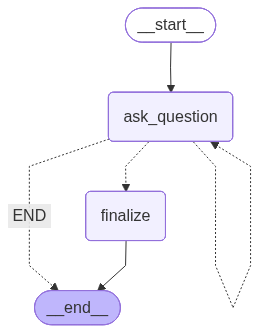

In [33]:
from IPython.display import Image, display
# View
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    print(graph.get_graph().draw_ascii(), '\n\n')
    print(graph.get_graph().draw_mermaid())
# https://mermaid.live/edit#pako:eNp1Ul2PmzAQ_CvWVlESCSjfSXynvFx-Qp9aTsgHdrBqbGTMtVfEf6-BHHdU6duOZ3Zn1nYPhSopYNhsei65wajfMqF-FRXRZjuiotOv1FZbwSUlejsMw2aTyasmTYW-XR4ymZk8b43V5_nux2NzXtDj1-b8vMcYM65bMwoLIkReW0ex-yj3N6boBDFcyXb3GUxs15TE0LzRinFBd2u4nyNQWS4BpnqxF2R2X4Ih1z2jjwAP_wa4x689_zPhBpHrzfQy8a5gPfKu5LbKzNk92gtlqKSMdMIg2yXwFxYynzFnfB63ovxaGRx44aphuv9J7qqGFNy8YX8lGG_oNu6FvaSsAAeumpeAje6oAzXVNRkh9JlEKANT0ZpmgG1ZEv0zg0wOtqch8rtS9XubVt21AsyIaC2a171wYv9OvZxquyDVT6qTBnB68qchgHv4DThIDp4fB2kchFESJUGSOvBmj1PvEPtRcAxPxyg6HeN4cODP5Ot7aRBExzSOQj9K0jA5DH8BLyP9pw


In [34]:
cfg = {"configurable": {"thread_id": '1'}}

# Kick off (provide initial state once)
output = graph.invoke({"messages": ['hello!']}, cfg)
output

{'messages': [HumanMessage(content='hello!', additional_kwargs={}, response_metadata={}, id='313de06d-210f-46b7-828f-cfe355dc3cf4'),
  AIMessage(content='Hi! We are currently offering help with:\n\n1. `Return Journey Planning`\n2. `Financial Recovery Aid Application`\n\nKindly reply with either `1` or `2`.\n', additional_kwargs={}, response_metadata={}, id='0c0acbb3-3de7-4d98-9f9e-da5d37c367be')],
 'awaiting_initial': True}

In [ ]:
AgentState()

In [581]:
# with open("financial_recovery_aid_form.json", "r") as f:
#     data = json.load(f)
# data_model = Topic(**data)
# data_model


Topic(topic_name='Financial Recovery Aid Application', topic_id='bc66ed8e-e3f0-4cf7-9e2e-9c3438312f6b', questions=[Question(question_topic='Financial Recovery Aid Application', question_id='cfed0e92-d0c2-4500-b61e-ebe89d7ff3e8', question_str='What is your current legal status in Germany?', options=[Predefined_Option(option_kind='predefined', option_number=1, option_str='Temporary Protection under EU Directive ', value=False), Predefined_Option(option_kind='predefined', option_number=2, option_str='Asylum application pending ', value=False), Predefined_Option(option_kind='predefined', option_number=3, option_str='Asylum granted ', value=False), Predefined_Option(option_kind='predefined', option_number=4, option_str='German residence permit ', value=False), Predefined_Option(option_kind='predefined', option_number=5, option_str='Other status ', value=False), Predefined_Option(option_kind='predefined', option_number=6, option_str='Unsure', value=False)]), Question(question_topic='Financia